In [1]:
include("/Users/quaidzahid/Documents/Research Professor/Mikhail Erementchouk/HN_V2/scripts/intro.jl")
using Graphs
using SimpleWeightedGraphs
using Dice 
using PrettyTables
using LinearAlgebra

using GraphPlot
using Plots
using StatsPlots
using HNProcess
using DataRefine
using PartitioningData
using IterTools
using Random

  Activating 

Currently active project is: HN_V2

Path of active project: /Users/quaidzahid/Documents/Research Professor/Mikhail Erementchouk/HN_V2

Have fun with your new project!

You can help us improve DrWatson by opening
issues on GitHub, submitting feature requests,
or even opening your own Pull Requests!



project at `~/Documents/Research Professor/Mikhail Erementchouk/HN_V2`


In [2]:
function objective_func_G_scaled(state, images, lambdas)
    s = 0
    for i in images
        temp = 0 
        temp =  (vec(state)'*vec(i))^2
        s += lambdas[findfirst(x -> x == i, images)] * temp
    end
    return (s * 0.25)
end

objective_func_G_scaled (generic function with 1 method)

In [3]:

function unique_random_binary_images(num, cardinality)
    images = []
    i = 0
    while i < num
        v = rand((-1,1),cardinality)
        if !(v in images || -1*v in images)
            push!(images, v)
            i += 1
        end
    end
    return reshape.(images, Int(sqrt(cardinality)), Int(sqrt(cardinality)))
end

unique_random_binary_images(64,256)

64-element Vector{Matrix{Int64}}:
 [1 1 … 1 1; -1 -1 … 1 -1; … ; -1 -1 … -1 -1; -1 1 … 1 1]
 [1 1 … 1 -1; 1 -1 … 1 -1; … ; -1 -1 … 1 -1; 1 -1 … -1 -1]
 [-1 1 … -1 1; -1 -1 … -1 -1; … ; -1 1 … 1 1; 1 1 … -1 -1]
 [1 -1 … 1 1; 1 -1 … -1 -1; … ; 1 1 … 1 -1; 1 -1 … 1 -1]
 [-1 1 … 1 1; -1 1 … -1 1; … ; -1 1 … -1 1; 1 -1 … 1 -1]
 [1 -1 … -1 1; -1 -1 … -1 -1; … ; -1 1 … 1 -1; -1 -1 … 1 -1]
 [1 -1 … 1 1; 1 -1 … -1 -1; … ; 1 1 … 1 -1; 1 -1 … 1 1]
 [1 -1 … 1 1; -1 -1 … 1 1; … ; 1 1 … -1 -1; -1 1 … 1 1]
 [-1 -1 … -1 -1; -1 -1 … 1 -1; … ; -1 -1 … -1 1; 1 -1 … -1 -1]
 [1 -1 … 1 -1; 1 1 … -1 1; … ; -1 1 … 1 1; 1 -1 … -1 1]
 [-1 1 … 1 1; 1 1 … -1 1; … ; -1 1 … -1 1; -1 1 … -1 -1]
 [-1 -1 … -1 1; 1 -1 … 1 -1; … ; -1 1 … -1 1; 1 1 … -1 -1]
 [-1 1 … 1 1; 1 -1 … 1 1; … ; -1 1 … -1 1; -1 -1 … -1 1]
 ⋮
 [1 -1 … 1 -1; 1 -1 … 1 -1; … ; 1 -1 … 1 1; -1 -1 … 1 -1]
 [1 1 … -1 1; -1 1 … 1 1; … ; 1 -1 … 1 -1; 1 1 … -1 -1]
 [-1 1 … 1 -1; -1 -1 … -1 -1; … ; -1 1 … -1 -1; -1 1 … 1 1]
 [1 -1 … -1 1; -1 1 … 1 -1; … ; -1

In [4]:
sim_time = 4
steps = 3000
parameters = Dict{String, Any}(
    "images" => three_random_orthogonal_image(64),
    "sim_time" => sim_time,
    "steps" => steps,
    "iterations" => 100, #Num of times attempted
    "num_agitations" => 1,
    "scaling" => 1.0,
    "delta" => -1* sim_time/steps,
    # This is the region that we will provide and the machine must keep this region constant
    # Will be a vector of tuples which are (row, col, state)
    "initial_stimuli" => [(1,1,1)]
)
println(length(parameters["images"]))

3


In [5]:
parameters["images"] = unique_random_binary_images(4,16)

4-element Vector{Matrix{Int64}}:
 [1 1 -1 -1; 1 -1 1 -1; 1 1 1 1; -1 1 1 -1]
 [-1 -1 1 -1; -1 1 1 1; -1 1 -1 -1; 1 1 -1 1]
 [1 1 -1 1; 1 -1 1 1; 1 -1 1 1; -1 -1 1 -1]
 [-1 -1 -1 1; -1 -1 -1 1; -1 1 -1 -1; 1 1 1 1]

In [6]:
A = zeros(length(parameters["images"]),length(parameters["images"]))
            for i in 1:(length(parameters["images"]))
                for k in i:(length(parameters["images"]))
                    D_ij = (vec(parameters["images"][i])' * vec(parameters["images"][k]))^2
                    A[i,k] = D_ij
                    A[k,i] = D_ij
                end
            end
            res = 1*ones(length(parameters["images"])) # change coeff if precision is not ideal
            lambdas = A \ res
            parameters["scaling"] = lambdas

4-element Vector{Float64}:
 0.002571874965616645
 0.001815441152199985
 0.001815441152199984
 0.0030339872589039136

In [7]:
function objective_func_G_scaled(state, images, lambdas)
    s = 0
    for i in images
        temp = 0 
        temp =  (vec(state)'*vec(i))^2
        s += lambdas[findfirst(x -> x == i, images)] * temp
    end
    return (s * 0.25)
end

objective_func_G_scaled (generic function with 1 method)

In [8]:
for i in 1:length(parameters["images"])
    println("$(i)th image, G value is $(objective_func_G_scaled(parameters["images"][i], parameters["images"], lambdas))")
end

1th image, G value is 0.25
2th image, G value is 0.25
3th image, G value is 0.25
4th image, G value is 0.25


# V2

In [13]:
convergences_16 = Dict{String, Any}(
    "image_count" => [],
    "conv_16" => [],
    "multiple_16" => []
)
parameters["scaling"] = 1.0
times_done = 10

elp = @elapsed begin
    for p in 1:16
        println(p)
        conv_16 = 0
        twos_16 = 0 
        multi_16 = 0
        for i in 1:times_done
            parameters["images"] = unique_random_binary_images(p,16)
            r = HN_Solver(parameters)
            sol_count = 0 
            rots = iterative_rotater_state(r,parameters)
            for st in rots
                if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                    -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                    sol_count +=1 
                end
            end
            if sol_count > 0
                conv_16 += 1
            end
            if sol_count >= 2
                multi_16 += 1 
            end
        end
        push!(convergences_16["image_count"], p)
        push!(convergences_16["conv_16"], conv_16/times_done)
        push!(convergences_16["multiple_16"], multi_16/times_done)
    end
end

println("took $elp seconds")



record_data(convergences_16, parameters, "4by4_no_scaling_400qual_rd")
# USE AS TEMPLATE FOR GRAPHS

p = plot(convergences_16["image_count"], 
    convergences_16["conv_16"], 
    xlabel="Number of Stored Images (p)",
    ylabel="Probability of Convergence",
    ylims=(-0.05, 1.05),
    dpi=400,
    marker=:circle, 
    markersize=3, 
    markercolor=:blue,
    legendtitle="Images Found",
    label="At least one (1+)"
)

plot!(
    convergences_16["image_count"],
    convergences_16["multiple_16"],
    marker=:square, 
    markersize=3, 
    markercolor=:orange,
    label="At least two (2+)"
)
savefig(p, "4by4_no_scaling_400qual.png")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
took 1.263819333 seconds
The results are saved to 4by4_no_scaling_400qual_rd


"/Users/quaidzahid/Documents/Research Professor/Mikhail Erementchouk/HN_V2/scripts/Paper Figures/completely random/4by4_no_scaling_400qual.png"

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
took 9.7906975 seconds


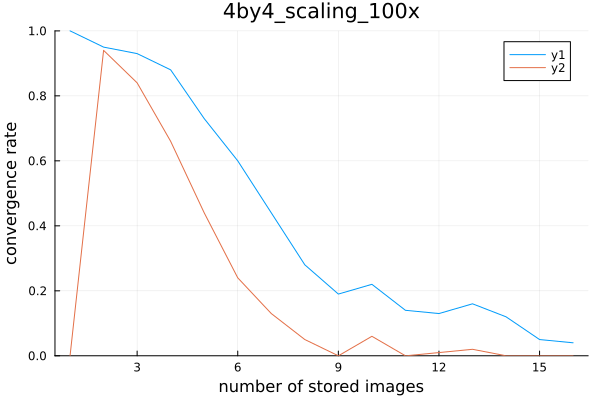

In [36]:
convergences_16 = Dict{String, Any}(
    "image_count" => [],
    "conv_16" => [],
    "multiple_16" => []
)
parameters["scaling"] = 1.0
s = 100
times_done = 100
elp = @elapsed begin
    for p in 1:16
        println(p)
        conv_16 = 0
        twos_16 = 0 
        multi_16 = 0
        for i in 1:times_done
            parameters["images"] = unique_random_binary_images(p,16)
            k = lambda_gen(parameters["images"],s)
            parameters["scaling"] = k
            r = HN_Solver(parameters)
            sol_count = 0 
            rots = iterative_rotater_state(r,parameters)
            for st in rots
                if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                    -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                    sol_count +=1 
                end
            end
            if sol_count > 0
                conv_16 += 1
            end
            if sol_count >= 2
                multi_16 += 1 
            end
        end
        push!(convergences_16["image_count"], p)
        push!(convergences_16["conv_16"], conv_16/times_done)
        push!(convergences_16["multiple_16"], multi_16/times_done)
    end
end

println("took $elp seconds")

plot(convergences_16["image_count"], 
    [convergences_16["conv_16"], convergences_16["multiple_16"]],
    title = "4by4_scaling_$(s)x", 
    xlabel="number of stored images",
    ylabel="convergence rate",
    ylims=(0, 1)
)

In [10]:
convergences_64 = Dict{String, Any}(
    "image_count" => [],
    "conv_16" => [],
    "multiple_16" => []
)
times_done = 1000
s= 3750
elp = @elapsed begin
    for p in 1:20
        println(p)
        conv_16 = 0
        twos_16 = 0 
        multi_16 = 0
        for i in 1:times_done
            parameters["images"] = unique_random_binary_images(p,64)
            k = lambda_gen(parameters["images"],s)
            parameters["scaling"] = k
            r = HN_Solver(parameters)
            sol_count = 0 
            rots = iterative_rotater_state(r,parameters)
            for st in rots
                if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                    -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                    sol_count +=1 
                end
            end
            if sol_count > 0
                conv_16 += 1
            end
            if sol_count >= 2
                multi_16 += 1 
            end
        end
        push!(convergences_64["image_count"], p)
        push!(convergences_64["conv_16"], conv_16/times_done)
        push!(convergences_64["multiple_16"], multi_16/times_done)
    end
end

println("took $elp seconds")

record_data(convergences_64, parameters, "8by8_rand_RawData_Weighted_val_$(s)_detail_$(times_done)")

p = plot(convergences_64["image_count"], 
    convergences_64["conv_16"], 
    xlabel="Number of Stored Images (p)",
    ylabel="Probability of Convergence",
    ylims=(-0.05, 1.05),
    dpi=400,
    marker=:circle, 
    markersize=3, 
    markercolor=:blue,
    legendtitle="Images Found",
    label="At least one (1+)"
)

plot!(
    convergences_64["image_count"],
    convergences_64["multiple_16"],
    marker=:square, 
    markersize=3, 
    markercolor=:orange,
    label="At least two (2+)"
)
savefig(p, "8by8_rand_Weighted_val_$(s)_detail_$(times_done).png")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
took 2466.340774416 seconds
convergences_64 = Dict{String, Any}("conv_16" => Any[1.0, 0.999, 0.982, 0.94, 0.885, 0.762, 0.572, 0.426, 0.256, 0.131, 0.071, 0.035, 0.021, 0.01, 0.001, 0.001, 0.0, 0.0, 0.0, 0.0], "image_count" => Any[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], "multiple_16" => Any[0.0, 0.926, 0.94, 0.826, 0.696, 0.5, 0.303, 0.176, 0.096, 0.041, 0.017, 0.006, 0.004, 0.002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])


"/Users/quaidzahid/Documents/Research Professor/Mikhail Erementchouk/HN_V2/scripts/Paper Figures/completely random/8by8_rand_Weighted_val_3750_detail_1000.png"

In [11]:
p = plot(convergences_64["image_count"], 
    convergences_64["conv_16"], 
    xlabel="Number of Stored Images (p)",
    ylabel="Probability of Convergence",
    ylims=(-0.05, 1.05),
    dpi=400,
    marker=:circle, 
    markersize=3, 
    markercolor=:blue,
    legendtitle="Images Found",
    label="At least one (1+)"
)

plot!(
    convergences_64["image_count"],
    convergences_64["multiple_16"],
    marker=:square, 
    markersize=3, 
    markercolor=:orange,
    label="At least two (2+)"
)
savefig(p, "8by8_rand_Weighted_val_$(s)_detail_$(times_done).png")

"/Users/quaidzahid/Documents/Research Professor/Mikhail Erementchouk/HN_V2/scripts/Paper Figures/completely random/8by8_rand_Weighted_val_3750_detail_1000.png"

In [12]:
convergences_64 = Dict{String, Any}(
    "image_count" => [],
    "conv_16" => [],
    "multiple_16" => []
)

times_done = 1000
elp = @elapsed begin
    for p in 1:20
        println(p)
        conv_16 = 0
        twos_16 = 0 
        multi_16 = 0
        for i in 1:times_done
            parameters["scaling"] = 1.0
            parameters["images"] = unique_random_binary_images(p,64)
            r = HN_Solver(parameters)
            sol_count = 0 
            rots = iterative_rotater_state(r,parameters)
            for st in rots
                if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                    -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                    sol_count +=1 
                end
            end
            if sol_count > 0
                conv_16 += 1
            end
            if sol_count >= 2
                multi_16 += 1 
            end
        end
        push!(convergences_64["image_count"], p)
        push!(convergences_64["conv_16"], conv_16/times_done)
        push!(convergences_64["multiple_16"], multi_16/times_done)
    end
end

println("took $elp seconds")

record_data(convergences_64, parameters, "8by8_rand_RawData_no_weight_detail_$(times_done)")

p = plot(convergences_64["image_count"], 
    convergences_64["conv_16"], 
    xlabel="Number of Stored Images (p)",
    ylabel="Probability of Convergence",
    ylims=(-0.05, 1.05),
    dpi=400,
    marker=:circle, 
    markersize=3, 
    markercolor=:blue,
    legendtitle="Images Found",
    label="At least one (1+)"
)

plot!(
    convergences_64["image_count"],
    convergences_64["multiple_16"],
    marker=:square, 
    markersize=3, 
    markercolor=:orange,
    label="At least two (2+)"
)
savefig(p, "8by8_rand_no_weight_detail_$(times_done).png")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
took 2732.468750667 seconds


"/Users/quaidzahid/Documents/Research Professor/Mikhail Erementchouk/HN_V2/scripts/Paper Figures/completely random/8by8_rand_no_weight_detail_1000.png"

2
took 35.706075917 seconds


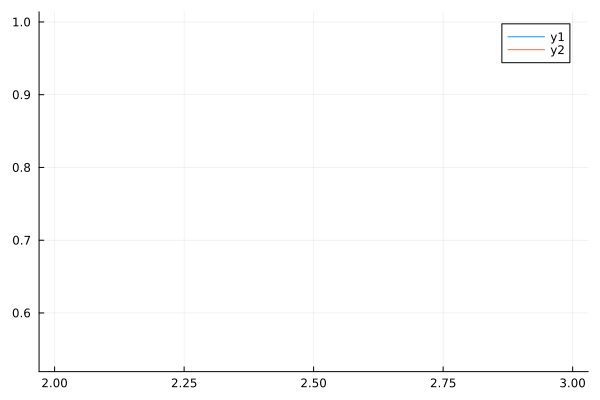

In [9]:
convergences_256 = Dict{String, Any}(
    "image_count" => [],
    "conv_16" => [],
    "multiple_16" => []
)
times_done = 100
elp = @elapsed begin
    for p in 1:25
        println(p)
        conv_16 = 0
        twos_16 = 0 
        multi_16 = 0
        for i in 1:times_done
            parameters["images"] = unique_random_binary_images(p,256)
            parameters["scaling"] = 1.0
            r = HN_Solver(parameters)
            sol_count = 0 
            rots = iterative_rotater_state(r,parameters)
            for st in rots
                if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                    -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                    sol_count +=1 
                end
            end
            if sol_count > 0
                conv_16 += 1
            end
            if sol_count >= 2
                multi_16 += 1 
            end
        end
        push!(convergences_256["image_count"], p)
        push!(convergences_256["conv_16"], conv_16/times_done)
        push!(convergences_256["multiple_16"], multi_16/times_done)
    end
end

println("took $elp seconds")

record_data(convergences_256, parameters, "16by16_rand_RawData_no_weight_detail_$(times_done)")

p = plot(convergences_256["image_count"], 
    convergences_256["conv_16"], 
    xlabel="Number of Stored Images (p)",
    ylabel="Probability of Convergence",
    ylims=(-0.05, 1.05),
    dpi=400,
    marker=:circle, 
    markersize=3, 
    markercolor=:blue,
    legendtitle="Images Found",
    label="At least one (1+)"
)

plot!(
    convergences_256["image_count"],
    convergences_256["multiple_16"],
    marker=:square, 
    markersize=3, 
    markercolor=:orange,
    label="At least two (2+)"
)
savefig(p, "16by16_rand_no_weight_detail_$(times_done).png")

In [29]:
convergences_256 = Dict{String, Any}(
    "image_count" => [],
    "conv_16" => [],
    "multiple_16" => []
)
s=10000
times_done = 100
elp = @elapsed begin
    for p in 1:25
        println(p)
        conv_16 = 0
        twos_16 = 0 
        multi_16 = 0
        for i in 1:times_done
            parameters["images"] = unique_random_binary_images(p,256)
            k = lambda_gen(parameters["images"],s)
            parameters["scaling"] = k
            r = HN_Solver(parameters)
            sol_count = 0 
            rots = iterative_rotater_state(r,parameters)
            for st in rots
                if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                    -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                    sol_count +=1 
                end
            end
            if sol_count > 0
                conv_16 += 1
            end
            if sol_count >= 2
                multi_16 += 1 
            end
        end
        push!(convergences_256["image_count"], p)
        push!(convergences_256["conv_16"], conv_16/times_done)
        push!(convergences_256["multiple_16"], multi_16/times_done)
    end
end

println("took $elp seconds")

record_data(convergences_256, parameters, "16by16_rand_RawData_Weighted_val_$(s)_detail_$(times_done)")

p = plot(convergences_256["image_count"], 
    convergences_256["conv_16"], 
    xlabel="Number of Stored Images (p)",
    ylabel="Probability of Convergence",
    ylims=(-0.05, 1.05),
    dpi=400,
    marker=:circle, 
    markersize=3, 
    markercolor=:blue,
    legendtitle="Images Found",
    label="At least one (1+)"
)

plot!(
    convergences_256["image_count"],
    convergences_256["multiple_16"],
    marker=:square, 
    markersize=3, 
    markercolor=:orange,
    label="At least two (2+)"
)
savefig(p, "16by16_rand_Weighted_val_$(s)_detail_$(times_done).png")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
took 744.076674667 seconds


"/Users/quaidzahid/Documents/Research Professor/Mikhail Erementchouk/HN_V2/scripts/Paper Figures/completely random/16by16_rand_Weighted_val_10000_detail_20.png"

In [13]:
println(convergences_256["multiple_16"])
k = parameters["images"]
dot(k[1],k[2])

Any[0.5333333333333333]


2

# HN OG

took 6.610878083 seconds


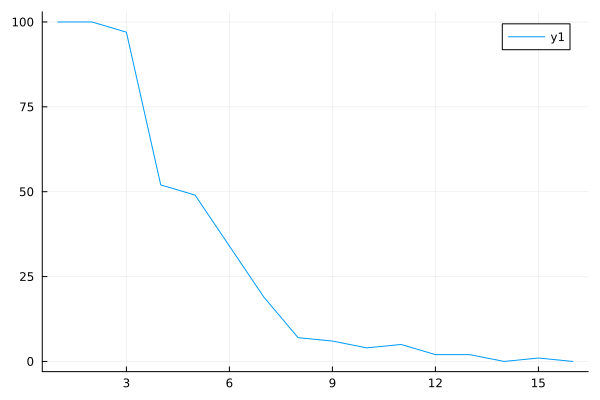

In [40]:
convergences_16_hn = Dict{String, Any}(
    "image_count" => [],
    "conv_16" => []
)
elp = @elapsed begin
    for p in 1:16
        hn_conv_16 =0 
        for i in 1:100
            parameters["images"] = unique_random_binary_images(p,16)
            r = HN_Solver(parameters)
            if (reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                -1 .*reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                hn_conv_16 +=1 
            end
        end
        push!(convergences_16_hn["image_count"], p)
        push!(convergences_16_hn["conv_16"], hn_conv_16)
    end
end
println("took $elp seconds")

plot(convergences_16_hn["image_count"], [convergences_16_hn["conv_16"]])

In [ ]:
image_set = orthogonal_image_generator(64)
convergences_64_hn = Dict{String, Any}(
    "image_count" => [],
    "conv_16" => []
)
elp = @elapsed begin
    for p in 1:64
        hn_conv_16 =0 
        for i in 1:100
            parameters["images"] = unique_random_binary_images(p,64)
            r = HN_Solver(parameters)
            if (reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                -1 .*reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                hn_conv_16 +=1 
            end
        end
        push!(convergences_64_hn["image_count"], p)
        push!(convergences_64_hn["conv_16"], hn_conv_16)
    end
end
println("took $elp seconds")

plot(convergences_64_hn["image_count"], [convergences_64_hn["conv_16"]])

In [29]:
image_set = orthogonal_image_generator(256)
convergences_256_hn = Dict{String, Any}(
    "image_count" => [],
    "conv_16" => []
)
elp = @elapsed begin
    for p in 1:256
        hn_conv_16 =0 
        for i in 1:100
            parameters["images"] = unique_random_binary_images(p,256)
            r = HN_Solver(parameters)
            if (reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                -1 .*reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                hn_conv_16 +=1 
            end
        end
        push!(convergences_256_hn["image_count"], p)
        push!(convergences_256_hn["conv_16"], hn_conv_16)
    end
end
println("took $elp seconds")

plot(convergences_256_hn["image_count"], [convergences_256_hn["conv_16"]])

83
took 199.903060958 seconds


In [18]:
shuffle(1:64)[1:5]

5-element Vector{Int64}:
 42
 37
 49
 55
 46